In [8]:
from utils import *
# from MySolution import MyClassifier, MyClustering, MyLabelSelection, MyFeatureSelection
from MySolution import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Synthetic data shape:  (1000, 2) (1000,)


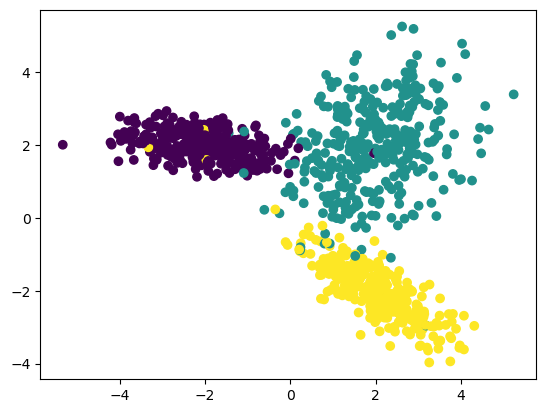

In [24]:
# Get datasets
syn_data = prepare_synthetic_data()
print("Synthetic data shape: ", syn_data['trainX'].shape, syn_data['trainY'].shape)

plt.scatter(syn_data['trainX'][:, 0], syn_data['trainX'][:, 1], c=syn_data['trainY'])

In [45]:
for l1 in [False, True]:
    for feat in [False, True]:
        classifier = OneAgainstAll(3)
        classifier.with_l1_loss = l1
        classifier.with_feature_expansion = feat
        classifier.train(syn_data['trainX'], syn_data['trainY'])
#         print(f"OneAgainstAll on training dataset, L1 loss={l1}, feature expansion = {feat}:",\
#               classifier.evaluate(syn_data['trainX'], syn_data['trainY']))
        print(f"OneAgainstAll on testing dataset, L1 loss={l1}, feature expansion = {feat}:",\
              classifier.evaluate(syn_data['testX'], syn_data['testY']))

OneAgainstAll on testing dataset, L1 loss=False, feature expansion = False: 0.972
OneAgainstAll on testing dataset, L1 loss=False, feature expansion = True: 0.97
OneAgainstAll on testing dataset, L1 loss=True, feature expansion = False: 0.972
OneAgainstAll on testing dataset, L1 loss=True, feature expansion = True: 0.976


In [46]:
for l1 in [False, True]:
    for feat in [False, True]:
        classifier = OneAgainstOne(3)
        classifier.with_l1_loss = l1
        classifier.with_feature_expansion = feat
        classifier.train(syn_data['trainX'], syn_data['trainY'])
#         print(f"OneAgainstAll on training dataset, L1 loss={l1}, feature expansion = {feat}:",\
#               classifier.evaluate(syn_data['trainX'], syn_data['trainY']))
        print(f"OneAgainstAll on testing dataset, L1 loss={l1}, feature expansion = {feat}:",\
              classifier.evaluate(syn_data['testX'], syn_data['testY']))

OneAgainstAll on testing dataset, L1 loss=False, feature expansion = False: 0.978
OneAgainstAll on testing dataset, L1 loss=False, feature expansion = True: 0.974
OneAgainstAll on testing dataset, L1 loss=True, feature expansion = False: 0.978
OneAgainstAll on testing dataset, L1 loss=True, feature expansion = True: 0.974


MNIST data shape:  (1000, 784) (1000,)


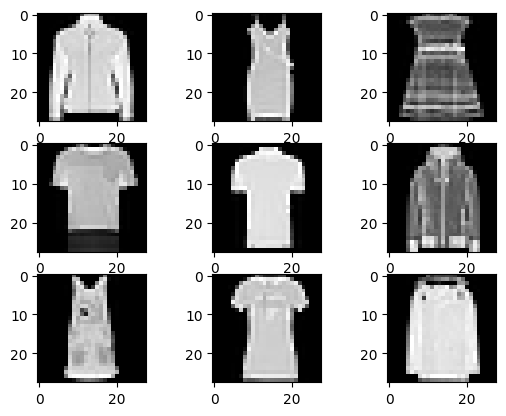

In [3]:
mnist_data = prepare_mnist_data()
print("MNIST data shape: ", mnist_data['trainX'].shape, mnist_data['trainY'].shape)

for i in range(9):	
    plt.subplot(330 + 1 + i)
    plt.imshow(mnist_data['trainX'][i].reshape(28,28), cmap='gray')
plt.show()

In [49]:
for l1 in [False, True]:
    for feat in [False, True]:
        classifier = OneAgainstAll(3)
        classifier.with_l1_loss = l1
        classifier.with_feature_expansion = feat
        classifier.train(mnist_data['trainX'], mnist_data['trainY'])
#         print(f"OneAgainstAll on training dataset, L1 loss={l1}, feature expansion = {feat}:",\
#               classifier.evaluate(mnist_data['trainX'], mnist_data['trainY']))
        print(f"OneAgainstAll on testing dataset, L1 loss={l1}, feature expansion = {feat}:",\
              classifier.evaluate(mnist_data['testX'], mnist_data['testY']))

OneAgainstAll on testing dataset, L1 loss=False, feature expansion = False: 0.76
OneAgainstAll on testing dataset, L1 loss=False, feature expansion = True: 0.8
OneAgainstAll on testing dataset, L1 loss=True, feature expansion = False: 0.91
OneAgainstAll on testing dataset, L1 loss=True, feature expansion = True: 0.92


In [51]:
for l1 in [False, True]:
    for feat in [False, True]:
        classifier = OneAgainstOne(3)
        classifier.with_l1_loss = l1
        classifier.with_feature_expansion = feat
        classifier.train(mnist_data['trainX'], mnist_data['trainY'])
#         print(f"OneAgainstOne on training dataset, L1 loss={l1}, feature expansion = {feat}:",\
#               classifier.evaluate(mnist_data['trainX'], mnist_data['trainY']))
        print(f"OneAgainstOne on testing dataset, L1 loss={l1}, feature expansion = {feat}:",\
              classifier.evaluate(mnist_data['testX'], mnist_data['testY']))

OneAgainstOne on testing dataset, L1 loss=False, feature expansion = False: 0.764
OneAgainstOne on testing dataset, L1 loss=False, feature expansion = True: 0.744
OneAgainstOne on testing dataset, L1 loss=True, feature expansion = False: 0.882
OneAgainstOne on testing dataset, L1 loss=True, feature expansion = True: 0.892


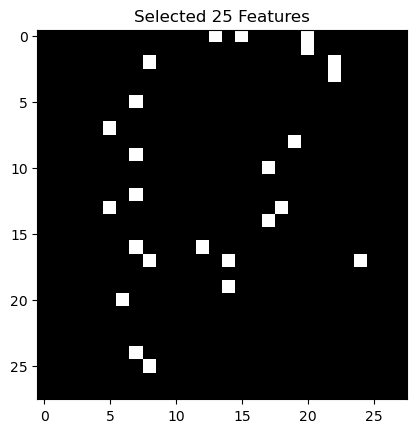

In [64]:
data = prepare_mnist_data()

feature_selector = MyFeatureSelection(25)
selected_features = feature_selector.construct_new_features(data['trainX'], data['trainY'])
trainX_small = data['trainX'][:, selected_features]
testX_small = data['testX'][:, selected_features]

visualize_features(selected_features)

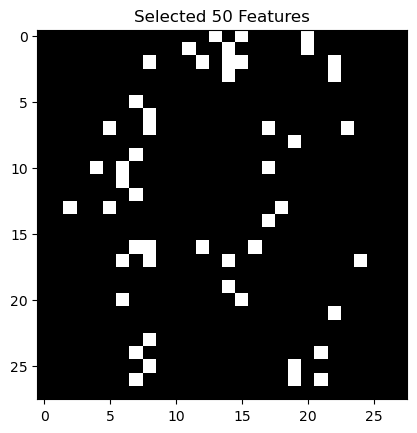

In [65]:
num_features = 50

selected_features = feature_selector.sorted_features[:num_features]
trainX_small = data['trainX'][:, selected_features]
testX_small = data['testX'][:, selected_features]

visualize_features(selected_features)

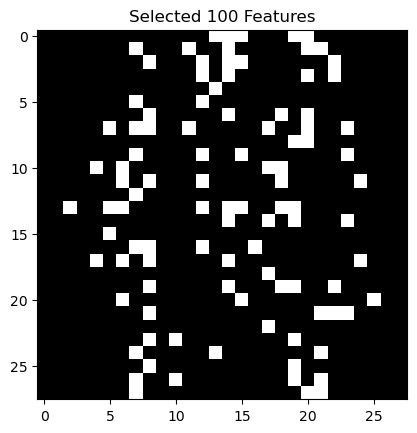

In [66]:
num_features = 100

selected_features = feature_selector.sorted_features[:num_features]
trainX_small = data['trainX'][:, selected_features]
testX_small = data['testX'][:, selected_features]

visualize_features(selected_features)

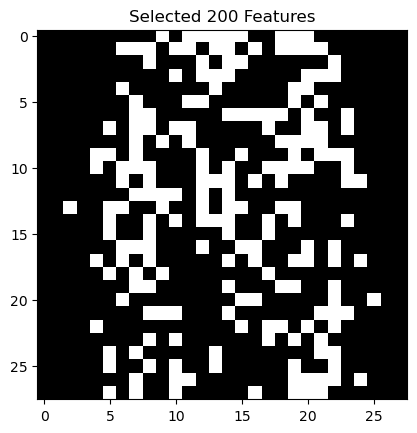

In [67]:
num_features = 200

selected_features = feature_selector.sorted_features[:num_features]
trainX_small = data['trainX'][:, selected_features]
testX_small = data['testX'][:, selected_features]

visualize_features(selected_features)

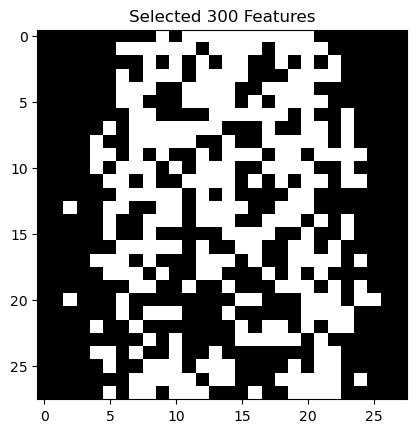

In [68]:
num_features = 300

selected_features = feature_selector.sorted_features[:num_features]
trainX_small = data['trainX'][:, selected_features]
testX_small = data['testX'][:, selected_features]

visualize_features(selected_features)

<IPython.core.display.Javascript object>


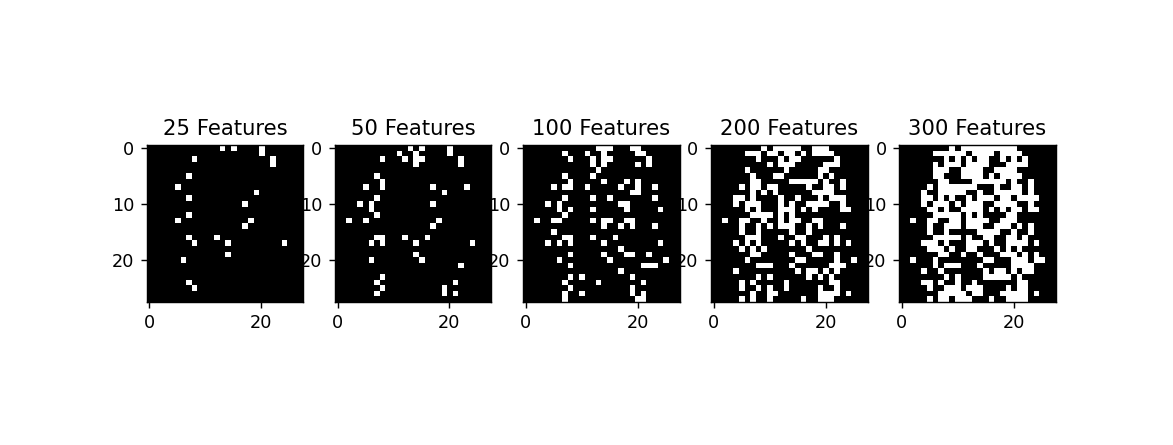

In [76]:
%matplotlib notebook
num_features = [25, 50, 100, 200, 300]
fig, axes = plt.subplots(1, 5)
for ax,n in zip(axes, num_features):
    selected_features = feature_selector.sorted_features[:n]
    feat_len = len(selected_features)
    feat_mask = np.zeros(784)
    feat_mask[selected_features] = 1
    ax.imshow(feat_mask.reshape(28,28), cmap='gray')
    ax.set_title(f'{feat_len} Features')
    

In [70]:
%pdb

Automatic pdb calling has been turned ON


In [ ]:
def visualize_features(feat_to_keep):
        feat_len = len(feat_to_keep)
        feat_mask = np.zeros(784)
        feat_mask[feat_to_keep] = 1
        plt.imshow(feat_mask.reshape(28,28), cmap='gray')
        plt.title(f'Selected {feat_len} Features')
        plt.show()

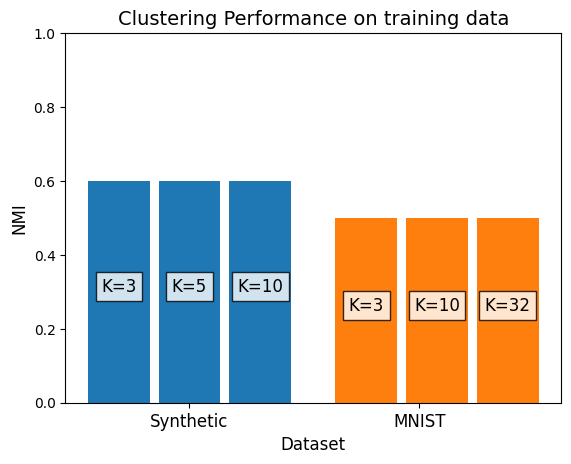

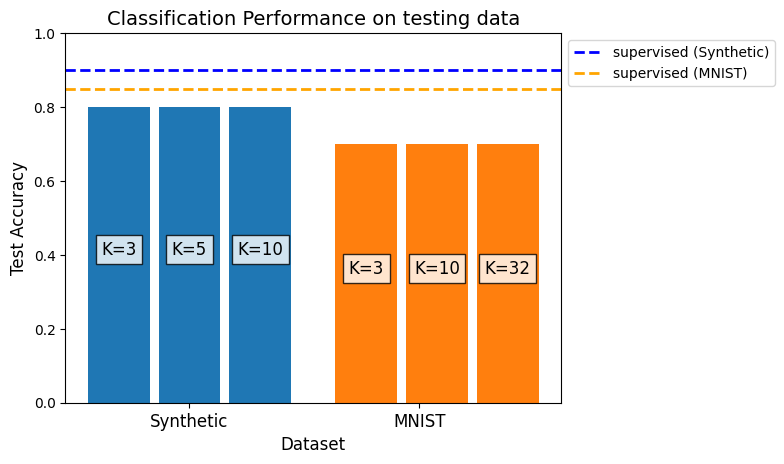

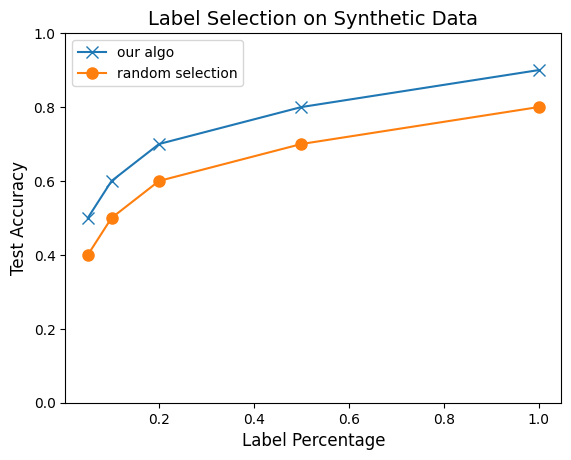

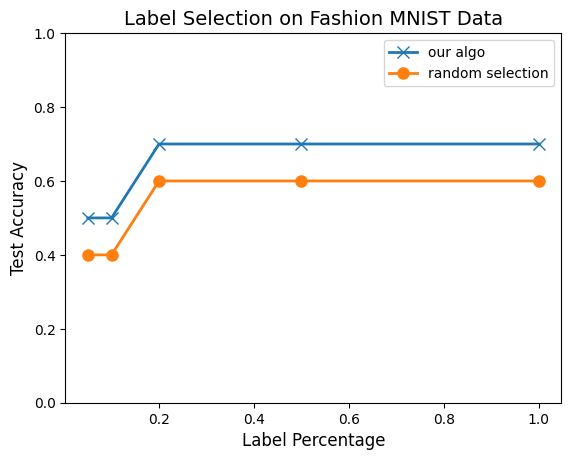

In [6]:
## TODO: Implement your solution and store the results in the following dictionaries
## Please note that the below values are given as an example to show the format, 
## you need to replace them with your values :)


# Task 1
result1 = {'synthetic_test_accuracy':0.9, 'mnist_test_accuracy':0.85}


# Task 2
result2 = {'synthetic':{'K':[3, 5, 10], 'clustering_nmi':[0.6,0.6,0.6], 'classification_accuracy':[0.8,0.8,0.8]},
            'mnist':{'K':[3, 10, 32], 'clustering_nmi':[0.5,0.5,0.5], 'classification_accuracy':[0.7,0.7,0.7]}}

# Task 3
# only include the plots for the option of task 3 you chosen in the report                    
result3_1 = {'synthetic': {'label_percentage':[0.05,0.1,0.2,0.5,1], 'test_accuracy(our algo)':[0.5,0.6,0.7,0.8,0.9], 'test_accuracy(random)':[0.4,0.5,0.6,0.7,0.8]},
            'mnist': {'label_percentage':[0.05,0.1,0.2,0.5,1], 'test_accuracy(our algo)':[0.5,0.5,0.7,0.7,0.7], 'test_accuracy(random)':[0.4,0.4,0.6,0.6,0.6]}}

result3_2 = {'feature_number':[5, 20, 80, 320, 784], 'classifier_accuracy(our algo)':[0.5,0.5,0.7,0.7,0.7], 'classifier_accuracy(random)':[0.4,0.4,0.6,0.6,0.6], 
                                                'clustering_accuracy(our algo)':[0.35,0.35,0.45,0.55,0.6], 'clustering_accuracy(random)':[0.3,0.3,0.4,0.5,0.6], 
                                                'nmi(our algo)':[0.35,0.4,0.45,0.5,0.5], 'nmi(random)':[0.3,0.35,0.4,0.5,0.5]}


plot_result(result1 = result1, result2 = result2, result3_1 = result3_1)

# Alternatively
# plot_result(result1 = result1, result2 = result2, result3_2 = result3_2)